# LUXE-NPOD Background Studies

Studies on kinematics distributions using LUXE signal samples.

We use two phase-0 samples:
- e0ppw_3.0_g4{0-4}
- e0ppw_7.0_g4{0-4}

Our reference page for LUXE signal MC samples is https://confluence.desy.de/display/LS/Signal+MC.

If we are at KIT, our signal samples are stored at KIT in Torben's /ceph directory:
`/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw`

If we are at DESY, our signal samples are stored at:
`/nfs/dust/luxe/group/MCProduction/Signal/g4/ptarmigan-v0.11/elaser/phase1/npod/`

In [7]:
!ls /ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw

e0ppw_3_0_0_particles_g4.root  e0ppw_7_0_0_particles_g4.root
e0ppw_3_0_1_particles_g4.root  e0ppw_7_0_1_particles_g4.root
e0ppw_3_0_2_particles_g4.root  e0ppw_7_0_2_particles_g4.root
e0ppw_3_0_3_particles_g4.root  e0ppw_7_0_3_particles_g4.root


In [8]:
import numpy as np
import pandas as pd
import uproot

We have more than one set of files, depending on the phase we want to study and the laser properties.

We define a set of dictionaries, one for each possbility. This will make the code more 'automatic' in understanding what files it has to read, where to store the output, etc.

In [12]:
from collections import OrderedDict

# Define variables 
variablesDic = {}

# Phase0, xi = 3.0 
variablesDic['phase0_e0ppw_3_0'] = {
    'output_folder' : 'e0ppw_3_0',
    'opening_list'  : [
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_3_0_0_particles_g4.root:Tracks",
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_3_0_1_particles_g4.root:Tracks",
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_3_0_2_particles_g4.root:Tracks",
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_3_0_3_particles_g4.root:Tracks",
    ],
    'BX'            : 4,
    'detid'         : 9000,
}

# Phase0, xi = 7.0
variablesDic['phase0_e0ppw_7_0'] = {
    'output_folder' : 'e0ppw_7_0',
    'opening_list'  : [
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_7_0_0_particles_g4.root:Tracks",
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_7_0_1_particles_g4.root:Tracks",
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_7_0_2_particles_g4.root:Tracks",
        "/ceph/ferber/LUXE/ptarmigan-v0.8.1/e-laser/phase0/ppw/e0ppw_7_0_3_particles_g4.root:Tracks",
    ],
    'BX'            : 4,
    'detid'         : 9000,
}

from npod_files import npod_files_list
# Phase1, NPOD sample
variablesDic['npod'] = {
    'output_folder' : 'npod',
    'opening_list'  : npod_files_list,
    'BX'            : 5,
    'detid'         : 9000,
}

In [13]:
# Define the phase and laser properties to study. Call it 'era'
era = 'phase0_e0ppw_3_0'

# These are our global variables
opening_list  = variablesDic[era]['opening_list']
output_folder = variablesDic[era]['output_folder'] 
BX            = variablesDic[era]['BX']
detid         = variablesDic[era]['detid']

# The energy cut does not depend on the phase, but on the detector: it is always the same.
# Since we cannot detect particles with energy below 'energy_cut' in any case, should we
# already cut them when we load the files?
# energy_cut = 0.5 # GeV
energy_cut = 0.0 # GeV

Read all the files at the same time. To reduce the memory needed, we load them one by one, selecting only events with the correct detid. We then concatenate the data frames associated to each file.

We select particles requiring:
- a `detid` value associated with the `BSM` detector
- z-position compatible with the crossing of the front face of the detector (`abs(z-16000)<0.1`)
- x- and y-positions inside the front face of the detector (`abs(x)<999.0` and `abs(y)<999.0`)


In [43]:
Tracks = uproot.open(opening_list[0])
df_tmp = Tracks.arrays(["E", "pdg","detid","weight","theta","phi","vtxx","vtxy","vtxz","px","py","pz","x","y","z","t"], library="pd")
df_bsm = df_tmp[(df_tmp["detid"]==detid) & (abs(df_tmp["z"]-16000) < 0.1) & (abs(df_tmp["x"]) < 999.0) & (abs(df_tmp["y"]) < 999.0) & (df_tmp["E"]>energy_cut)]
df_bsm.head(10)

for i in range(1, len(opening_list)):
    Tracks = uproot.open(opening_list[i])
    df_tmp = Tracks.arrays(["E", "pdg","detid","weight","theta","phi","vtxx","vtxy","vtxz","px","py","pz","x","y","z","t"], library="pd")
    df_tmp_bsm = df_tmp[(df_tmp["detid"]==detid) & (abs(df_tmp["z"]-16000) < 0.1) & (abs(df_tmp["x"]) < 999.0) & (abs(df_tmp["y"]) < 999.0) & (df_tmp["E"]>energy_cut)]
    df_bsm.append(df_tmp_bsm)

In [44]:
df_bsm.head(10)

E   pdg  detid  weight     theta       phi  \
entry subentry                                                          
4     5         1.186435e-10  2112   9000  1500.0  1.099726  0.255745   
84    5         1.972340e-04  2112   9000  1500.0  0.312968 -0.994069   
      6         1.035873e-04  2112   9000  1500.0  0.563941 -1.829657   
205   10        1.232279e-03   -12   9000  1500.0  0.130703  0.516156   
206   7         1.341501e-03   -12   9000  1500.0  0.553284  0.482709   
225   7         3.559692e-10  2112   9000  1500.0  0.522711 -1.314990   
236   5         1.843594e-06  2112   9000  1500.0  0.165706 -0.245008   
243   41        4.525873e-12  2112   9000  1500.0  0.340498 -2.843154   
      46        3.770494e-09  2112   9000  1500.0  0.553394  0.198595   
271   11        2.079535e-05   -12   9000  1500.0  0.502654 -0.133800   

                       vtxx         vtxy         vtxz            px  \
entry subentry                                                        
4     5         -119.834466     6.857973  7319.632572  1.287237e-05   
84    5          118.895719   111.979832  9077.613133  3.232220e-03   
      6          118.895719   111.979832  9077.613133 -1.909034e-03   
205   10        -951.281385  -156.848640  5339.943914  1.396818e-04   
206   7        -3185.414119 -2495.685199  9226.383862  6.243923e-04   
225   7         -122.284250     0.143820  7328.524889  3.267009e-06   
236   5         -125.705188    10.690421  7353.648692  2.978458e-04   
243   41        -377.167640  -191.355322  7230.406714 -9.308626e-07   
      46         -99.804831  -102.362194  7560.556186  4.337042e-05   
271   11       -4360.544152  1131.900304  6839.251993  9.928679e-06   

                          py        pz           x           y        z  \
entry subentry                                                            
4     5         3.365739e-06  0.000007  574.020567   58.818575  16000.0   
84    5        -4.968815e-03  0.018318  462.739071  473.245123  16000.0   
      6        -7.209289e-03  0.011792  447.515809 -604.981044  16000.0   
205   10        7.926499e-05  0.001222  267.456614  534.746690  16000.0   
206   7         3.272181e-04  0.001141  520.181232 -553.736632  16000.0   
225   7        -1.249162e-05  0.000022 -560.956969   73.455130  16000.0   
236   5        -7.447068e-05  0.001836  371.684502  547.009540  16000.0   
243   41       -2.863577e-07  0.000003 -243.495758  697.114095  16000.0   
      46        8.728201e-06  0.000072  533.861470  263.298398  16000.0   
271   11       -1.336446e-06  0.000018  630.595442  460.070094  16000.0   

                           t  
entry subentry                
4     5         3.696720e+06  
84    5         1.542563e+03  
      6         3.577629e+03  
205   10        2.943165e+13  
206   7         2.498595e+13  
225   7         1.617855e+06  
236   5         1.925435e+04  
243   41        1.794655e+07  
      46        4.343191e+05  
271   11        4.953846e+35

Now, plot kinematical distributions of neutrons and photons reaching the ``BSM`` detector.

For that, we can use this simple plotting function.

In [16]:
import matplotlib.pyplot as plt
import sys,os

def plot_histo(df, variable, weight=1, bins=10, range=None, title="", x_label="", y_label="", file_name=None, folder_name=None, file_format="png", y_log=False):
    """Plots distributions from a dataframe

    df: input dataframe
    variable: distribution to plot
    title: appears on top of the plot
    weight: weight to apply to the histogram
    bins: number of bins
    range: x-axis range (tuple)
    x_label: label of x-axis
    y_label: label of y-axis
    file_name: if not empty, name of file where plot is printed
    folder_name: if not empty, name of directory where plot is printed
    file_format: if file_name not empty, format of output file
    """

    # Prepare histogram
    # df[variable].plot(kind='hist', weights=weight)
    plt.hist(df[variable], bins=bins, weights=weight, range=range)
    if y_log == True:
        plt.yscale('log')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Preparing output
    if file_name:
        output_name = file_name + "." + file_format
        if folder_name:
            command = "mkdir -p {}".format(folder_name)
            os.system(command)
            output_name = folder_name + "/" + file_name + "." + file_format
        plt.savefig(output_name)

### Photons

We select photons requiring the `pdg` variable of the particle to be `22`.

In [50]:
df_photons = df_bsm[df_bsm['pdg']==22]
df_photons.head(10)

,,E,pdg,detid,weight,theta,phi,vtxx,vtxy,vtxz,px,py,pz,x,y,z,t
entry,subentry,,,,,,,,,,,,,,,,
368,8,0.000232,22,9000,1500.0,0.524575,-0.488965,-1587.336596,-130.311793,12788.755815,0.000103,-0.000055,0.000201,156.792612,-961.619356,16000.0,1.697100e+06
583,5,0.003539,22,9000,1500.0,0.905123,0.722845,-3604.961917,-2307.099095,12160.237729,0.002087,0.001841,0.002186,62.142969,927.707912,16000.0,1.676043e+06
625,9,0.006165,22,9000,1500.0,0.531576,-2.189683,2202.237847,1106.159390,11966.818682,-0.001813,-0.002545,0.005314,819.944325,-823.704843,16000.0,1.336200e+06
660,8,0.000108,22,9000,1500.0,0.680851,-0.664940,-962.515183,-121.962632,8043.742563,0.000054,-0.000042,0.000084,-473.374047,-812.676706,16000.0,2.535672e+05
1097,8,0.002629,22,9000,1500.0,1.133720,-1.570224,-438.854112,1955.568634,14711.637377,0.000001,-0.002382,0.001113,-436.565660,-791.068799,16000.0,4.461810e+13
1126,7,0.000641,22,9000,1500.0,0.960666,-0.114437,-3515.148252,443.968686,13201.885397,0.000522,-0.000060,0.000367,128.049679,-72.678258,16000.0,4.403102e+05
1303,7,0.000575,22,9000,1500.0,0.118184,2.521446,2210.812271,-2.587091,13135.037667,-0.000055,0.000039,0.000571,910.589847,576.813263,16000.0,1.076735e+06
1407,7,0.003309,22,9000,1500.0,0.253542,-2.211092,1502.326132,1871.435285,7353.003137,-0.000496,-0.000666,0.003203,163.719490,74.656470,16000.0,2.694588e+05
1410,22,0.000434,22,9000,1500.0,0.478719,-0.870000,289.383567,51.732694,14383.986116,0.000129,-0.000153,0.000385,834.464422,-589.764547,16000.0,1.070795e+06


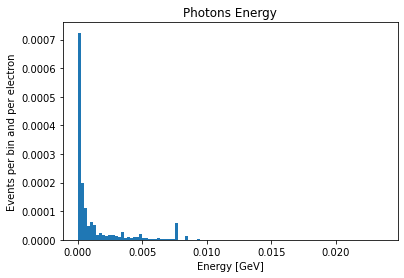

In [32]:
# Photons Energy
plot_histo(df_photons, 'E', 
           weight      = df_photons['weight']/(BX),
           bins        = 100,
           title       = "Photons Energy Distribution in 1 BX",
           x_label     = "Energy [GeV]",
           y_label     = "Events per bin and per BX",
           file_name   = "E_gamma",
           folder_name = output_folder)

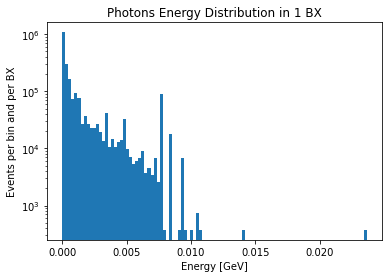

In [67]:
# Photons Energy - log scale
plot_histo(df_photons, 'E', 
           weight      = df_photons['weight']/(BX),
           bins        = 100,
           #range       = (0,5),
           y_log       = True,
           title       = "Photons Energy Distribution in 1 BX", 
           x_label     = "Energy [GeV]",
           y_label     = "Events per bin and per BX",
           file_name   = "log_E_gamma",
           folder_name = output_folder)

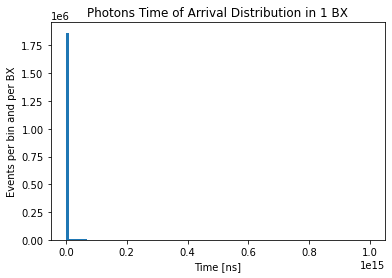

In [54]:
# Photons Time of Arrival
plot_histo(df_photons, 't', 
           weight      = df_photons['weight']/(BX),
           bins        = 100,
           range       = (0,1e15),
           title       = "Photons Time of Arrival Distribution in 1 BX",
           x_label     = "Time [ns]",
           y_label     = "Events per bin and per BX",
           file_name   = "t_gamma",
           folder_name = output_folder)

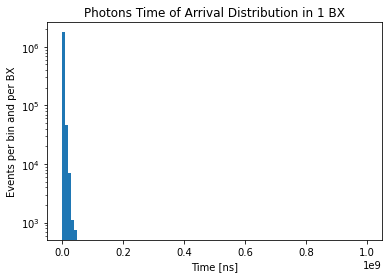

In [65]:
# Photons Time of Arrival (log scale)
plot_histo(df_photons, 't', 
           weight      = df_photons['weight']/(BX),
           bins        = 100,
           range       = (0,1e9),
           y_log       = True,
           title       = "Photons Time of Arrival Distribution in 1 BX",
           x_label     = "Time [ns]",
           y_label     = "Events per bin and per BX",
           file_name   = "log_t_gamma",
           folder_name = output_folder)

### Neutrons

We select photons requiring the `pdg` variable of the particle to be `2112`.

In [46]:
df_neutrons = df_bsm[df_bsm['pdg']==2112]
df_neutrons.head(10)

E   pdg  detid  weight     theta       phi  \
entry subentry                                                          
4     5         1.186435e-10  2112   9000  1500.0  1.099726  0.255745   
84    5         1.972340e-04  2112   9000  1500.0  0.312968 -0.994069   
      6         1.035873e-04  2112   9000  1500.0  0.563941 -1.829657   
225   7         3.559692e-10  2112   9000  1500.0  0.522711 -1.314990   
236   5         1.843594e-06  2112   9000  1500.0  0.165706 -0.245008   
243   41        4.525873e-12  2112   9000  1500.0  0.340498 -2.843154   
      46        3.770494e-09  2112   9000  1500.0  0.553394  0.198595   
299   5         1.055907e-05  2112   9000  1500.0  0.964952  2.158243   
368   7         3.572961e-08  2112   9000  1500.0  1.251556 -2.533612   
372   5         1.021382e-04  2112   9000  1500.0  0.369919 -0.959742   

                      vtxx        vtxy         vtxz            px  \
entry subentry                                                      
4     5        -119.834466    6.857973  7319.632572  1.287237e-05   
84    5         118.895719  111.979832  9077.613133  3.232220e-03   
      6         118.895719  111.979832  9077.613133 -1.909034e-03   
225   7        -122.284250    0.143820  7328.524889  3.267009e-06   
236   5        -125.705188   10.690421  7353.648692  2.978458e-04   
243   41       -377.167640 -191.355322  7230.406714 -9.308626e-07   
      46        -99.804831 -102.362194  7560.556186  4.337042e-05   
299   5        -109.769511    3.236043  7364.698831 -2.029419e-03   
368   7        -140.474307   26.383800  7309.566450 -2.019364e-04   
372   5        -213.207081  108.632866  7216.802939  2.873754e-03   

                          py        pz           x           y        z  \
entry subentry                                                            
4     5         3.365739e-06  0.000007  574.020567   58.818575  16000.0   
84    5        -4.968815e-03  0.018318  462.739071  473.245123  16000.0   
      6        -7.209289e-03  0.011792  447.515809 -604.981044  16000.0   
225   7        -1.249162e-05  0.000022 -560.956969   73.455130  16000.0   
236   5        -7.447068e-05  0.001836  371.684502  547.009540  16000.0   
243   41       -2.863577e-07  0.000003 -243.495758  697.114095  16000.0   
      46        8.728201e-06  0.000072  533.861470  263.298398  16000.0   
299   5         3.047800e-03  0.002537  570.735844 -385.245368  16000.0   
368   7        -1.405312e-04  0.000081 -312.870856 -781.512955  16000.0   
372   5        -4.102493e-03  0.012917 -214.379386 -261.623032  16000.0   

                           t  
entry subentry                
4     5         3.696720e+06  
84    5         1.542563e+03  
      6         3.577629e+03  
225   7         1.617855e+06  
236   5         1.925435e+04  
243   41        1.794655e+07  
      46        4.343191e+05  
299   5         9.896892e+03  
368   7         1.198716e+05  
372   5         2.417296e+03

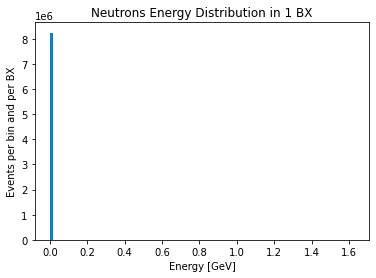

In [47]:
# Neutrons Energy
plot_histo(df_neutrons, 'E', 
           weight      = df_neutrons['weight']/(BX),
           bins        = 100,
           title       = "Neutrons Energy Distribution in 1 BX",
           x_label     = "Energy [GeV]",
           y_label     = "Events per bin and per BX",
           file_name   = "E_neutrons",
           folder_name = output_folder)

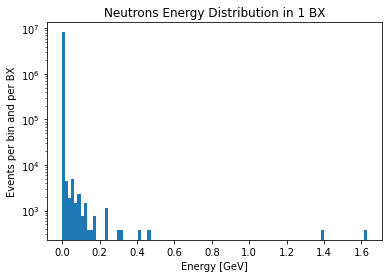

In [48]:
# Neutrons Energy - log scale
plot_histo(df_neutrons, 'E', 
           weight      = df_neutrons['weight']/(BX),
           bins        = 100,
           #range       = (0,5),
           y_log       = True,
           title       = "Neutrons Energy Distribution in 1 BX", 
           x_label     = "Energy [GeV]",
           y_label     = "Events per bin and per BX",
           file_name   = "log_E_neutrons",
           folder_name = output_folder)

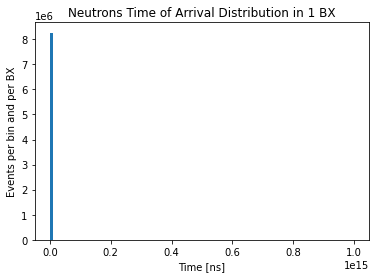

In [58]:
# Neutrons Time of Arrival
plot_histo(df_neutrons, 't', 
           weight      = df_neutrons['weight']/(BX),
           bins        = 100,
           range       = (0,1e15),
           title       = "Neutrons Time of Arrival Distribution in 1 BX",
           x_label     = "Time [ns]",
           y_label     = "Events per bin and per BX",
           file_name   = "t_neutrons",
           folder_name = output_folder)

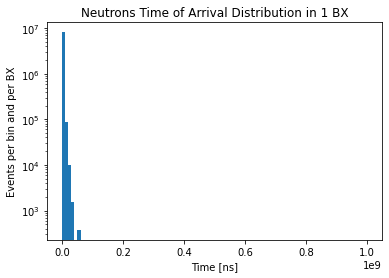

In [64]:
# Neutrons Time of Arrival
plot_histo(df_neutrons, 't', 
           weight      = df_neutrons['weight']/(BX),
           bins        = 100,
           range       = (0,1e9),
           y_log       = True,
           title       = "Neutrons Time of Arrival Distribution in 1 BX",
           x_label     = "Time [ns]",
           y_label     = "Events per bin and per BX",
           file_name   = "log_t_neutrons",
           folder_name = output_folder)